The number of principal components for 80% cumulative explained variance is: 2


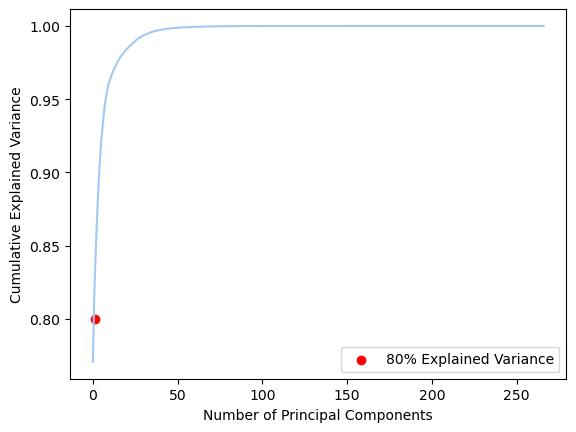

Number of clusters: 3
Cluster 0: 16637 models
Cluster 1: 639 models
Cluster 2: 5300 models


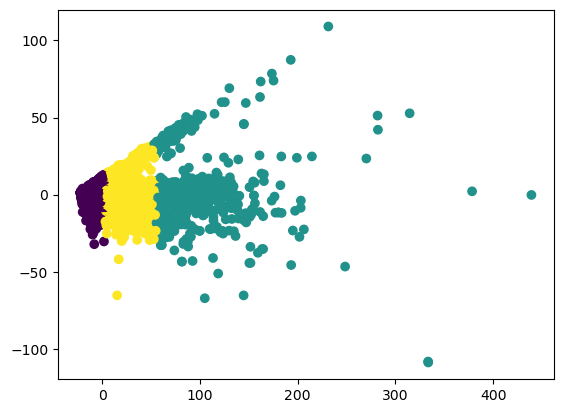

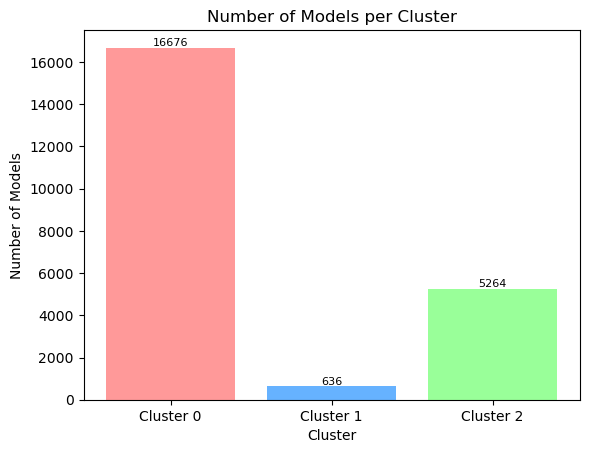

In [61]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Code to load binary strings
file_path_clusters = "./data/Cleaned data/BPMNcleaned_with_clusters.csv"
file_path_domain = "./data/Cleaned data/BPMNcleaned_with_domain.csv"

# Load the clusters DataFrame
df_clusters = pd.read_csv(file_path_clusters, sep=',', engine='python', encoding='utf-8')

# Apply PCA
pca = PCA()
X = df_clusters.drop(columns=['Cluster']).values
X_pca = pca.fit_transform(X)

# Calculate cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index where cumulative explained variance exceeds 80%
index_80_percent = np.where(cumulative_variance_ratio >= 0.8)[0][0]

# Extract components for 80% explained variance
components_80_percent = pca.components_[:index_80_percent + 1]

# Print the number of principal components
print(f"The number of principal components for 80% cumulative explained variance is: {len(components_80_percent)}")
pca = PCA(components_80_percent)

# Plot the cumulative explained variance graph
plt.plot(cumulative_variance_ratio)
plt.scatter(index_80_percent, 0.8, color='red', label='80% Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.savefig('./data/Cleaned data/ExplainedVariance.png')
plt.show()

# Apply K-Means clustering with the selected number of components
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_pca[:, :index_80_percent + 1])

# Add a new column 'Cluster' to the original DataFrame
df_clusters['Cluster'] = clusters

# Load the domain DataFrame
df_domain = pd.read_csv(file_path_domain, sep=',', engine='python', encoding='utf-8')

# Assuming the DataFrames have the same index
merged_df = pd.concat([df_clusters, df_domain['Domain']], axis=1)

# Save the merged DataFrame to a new CSV file
output_file_path_merged = "./data/Cleaned data/BPMNcleaned_merged.csv"
merged_df.to_csv(output_file_path_merged, index=False)

# Print cluster information
unique_clusters, counts = np.unique(clusters, return_counts=True)
print(f"Number of clusters: {len(unique_clusters)}")

for i, count in zip(unique_clusters, counts):
    print(f"Cluster {i}: {count} models")

# You can plot a 3D scatter plot if you have more than 2 components
# Replace X_pca[:, :2] with X_pca[:, :3] if you have 3 components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.show()

numero_di_cluster = 3
modelli_per_cluster = [16676, 636, 5264]
cluster_labels = [f'Cluster {i}' for i in range(numero_di_cluster)]
colors = ['#FF9999', '#66B2FF', '#99FF99']
fig, ax = plt.subplots()
bars = ax.bar(cluster_labels, modelli_per_cluster, color=colors)
for bar, label in zip(bars, modelli_per_cluster):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval),
            ha='center', va='bottom', fontsize=8, color='black')

ax.set_xlabel('Cluster')
ax.set_ylabel('Number of Models')
ax.set_title('Number of Models per Cluster')
plt.show()

Cluster                    0    1     2
Domain                                 
Industry                 360  142   327
Public Administration     94    0    22
Training Session       16183  497  4951
La somma totale è: 22576


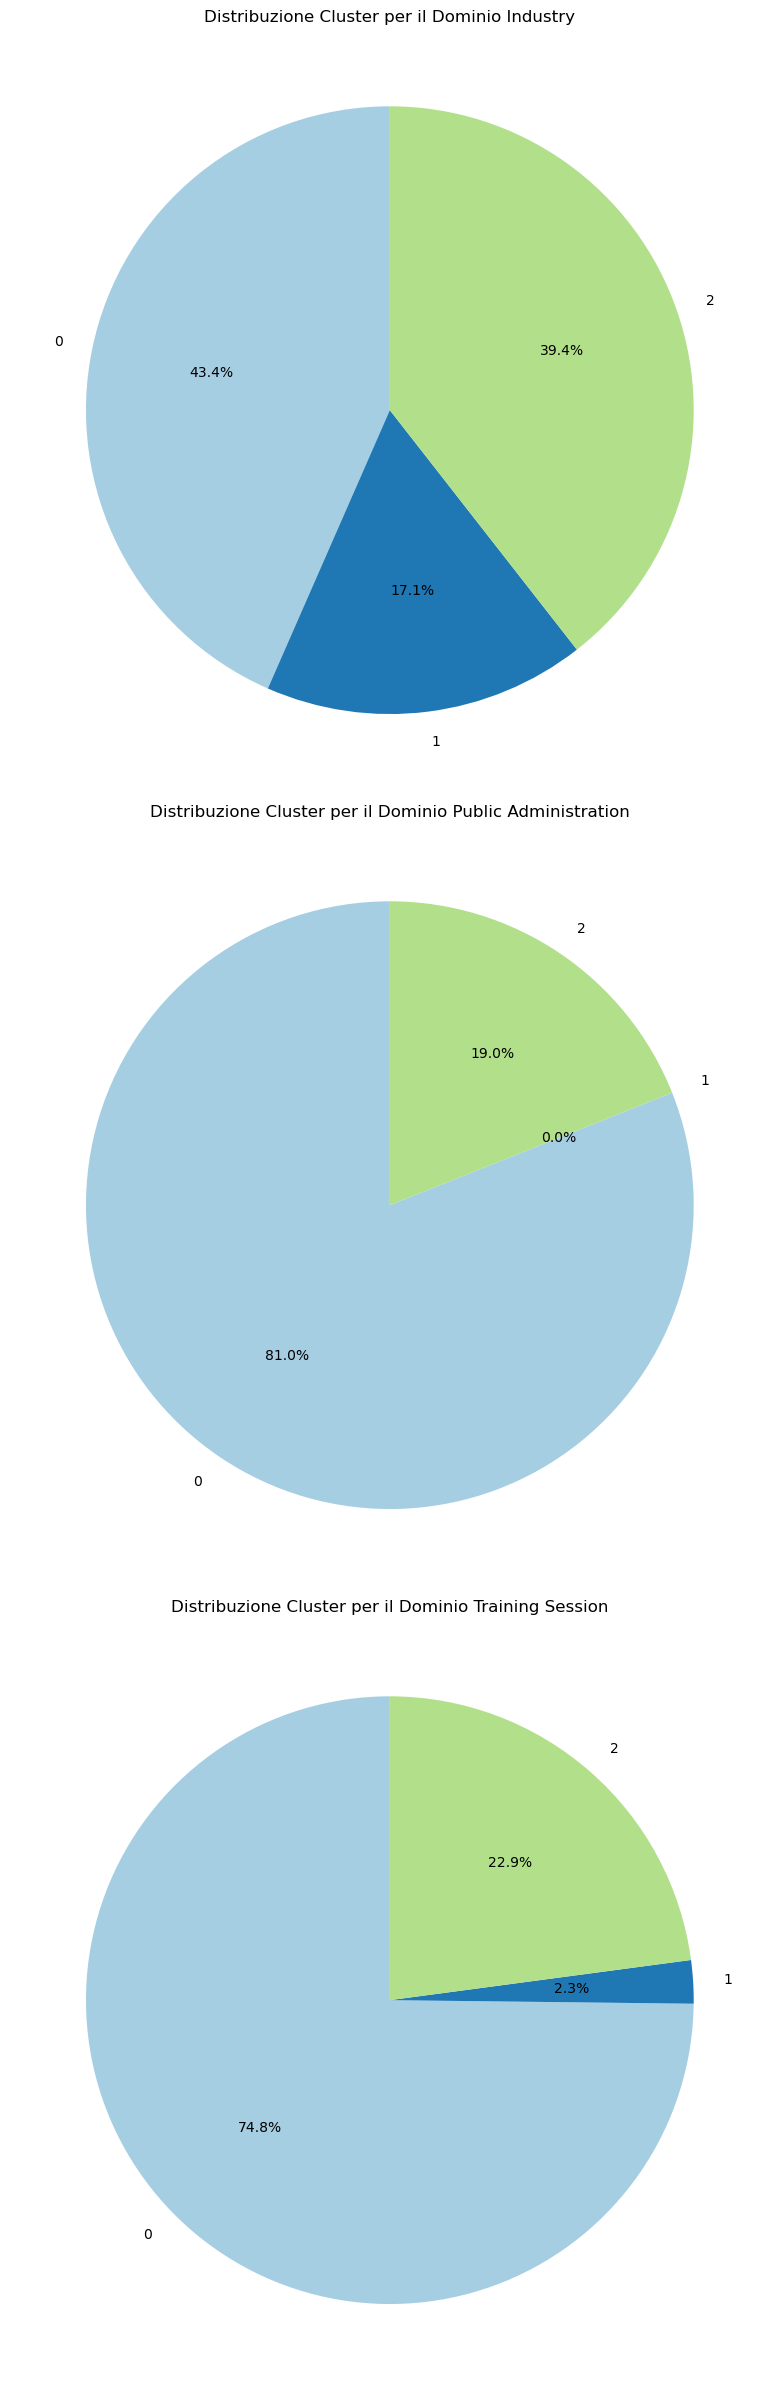

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file CSV
file_path = "./data/Cleaned data/BPMNcleaned_merged.csv"
data = pd.read_csv(file_path)

grouped_data = data.groupby(['Domain', 'Cluster']).size().reset_index(name='Count')

pivot_table = grouped_data.pivot_table(values='Count', index='Domain', columns='Cluster', aggfunc='first', fill_value=0)

print(pivot_table)

total_sum = pivot_table.sum().sum()
print("La somma totale è:", total_sum)

fig, axes = plt.subplots(nrows=len(pivot_table.index), ncols=1, figsize=(8, 8 * len(pivot_table.index)))

for i, domain in enumerate(pivot_table.index):
    axes[i].pie(pivot_table.loc[domain], labels=pivot_table.columns, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(pivot_table.columns))))
    axes[i].set_title(f'Distribuzione Cluster per il Dominio {domain}')

plt.tight_layout()
plt.show()
